In [1]:
# import basic librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
import warnings

import warnings
warnings.filterwarnings("ignore")

# Reading in Dataset

In [2]:
# reading in raw data from directly from uci ML repository 
df = pd.read_csv('processed.cleveland.data',sep = ',',header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Formatting columns

In [3]:
# adding in columns names
df.columns =['age', 'sex', 'cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Cleaning data

In [4]:
# looking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# looking for rows with ? 
(df == '?').sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [6]:
# dropping rows with ? 
df = df[df.ca != '?']
df = df[df.thal != '?']

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


# Formatting columns to apropriate data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  target    297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


In [9]:
# converting fields ca and thal from objects to floats 
df['thal'] = pd.to_numeric(df['thal'])
df['ca'] = pd.to_numeric(df['ca'])

In [10]:
# changing all columns except oldpeak to int data type 
cols=[i for i in df.columns if i not in ["oldpeak","target"]]
for col in cols:
    df[col]=df[col].astype(np.int64)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.8 KB


In [12]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3


# Converting target variable to binary 

In [13]:
# 0 = no CVD, 1-3 = CVD 
print(df.target.value_counts())

0    160
1     54
2     35
3     35
4     13
Name: target, dtype: int64


In [14]:
# changing rows in target field with number other than 0 to 1
df.loc[df['target'] != 0, 'target'] = 1

In [15]:
# viwing fixed target field
print(df.target.value_counts())

0    160
1    137
Name: target, dtype: int64


# Formatting catagorical variables labels to start with 0 

In [16]:
# chest pain field starts with 1 ,so changing it to start with 0
print(df.cp.value_counts())

4    142
3     83
2     49
1     23
Name: cp, dtype: int64


In [17]:
# change from 1-4 to 0-3
df.loc[df['cp'] == 1, 'cp'] = 0
df.loc[df['cp'] == 2, 'cp'] = 1
df.loc[df['cp'] == 3, 'cp'] = 2
df.loc[df['cp'] == 4, 'cp'] = 3

In [18]:
# viewing fixed labels
print(df.cp.value_counts())

3    142
2     83
1     49
0     23
Name: cp, dtype: int64


In [19]:
# changing slope field
print(df.slope.value_counts())

1    139
2    137
3     21
Name: slope, dtype: int64


In [20]:
df.loc[df['slope'] == 1, 'slope'] = 0
df.loc[df['slope'] == 2, 'slope'] = 1
df.loc[df['slope'] == 3, 'slope'] = 2

In [21]:
# viewing fixed labels
print(df.slope.value_counts())

0    139
1    137
2     21
Name: slope, dtype: int64


In [22]:
# changing thal 
print(df.thal.value_counts())

3    164
7    115
6     18
Name: thal, dtype: int64


In [23]:
df.loc[df['thal'] == 3, 'thal'] = 0
df.loc[df['thal'] == 6, 'thal'] = 1
df.loc[df['thal'] == 7, 'thal'] = 2

In [24]:
# viewing fixed thal labels
print(df.thal.value_counts())

0    164
2    115
1     18
Name: thal, dtype: int64


In [25]:
#  viewing cleaned and formatted dataframe
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,0,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,2,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,0,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,3,140,241,0,0,123,1,0.2,1,0,2,1
298,45,1,0,110,264,0,0,132,0,1.2,1,0,2,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,2,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,2,1


# Exploratory data analysis

## Multivariate Analysis

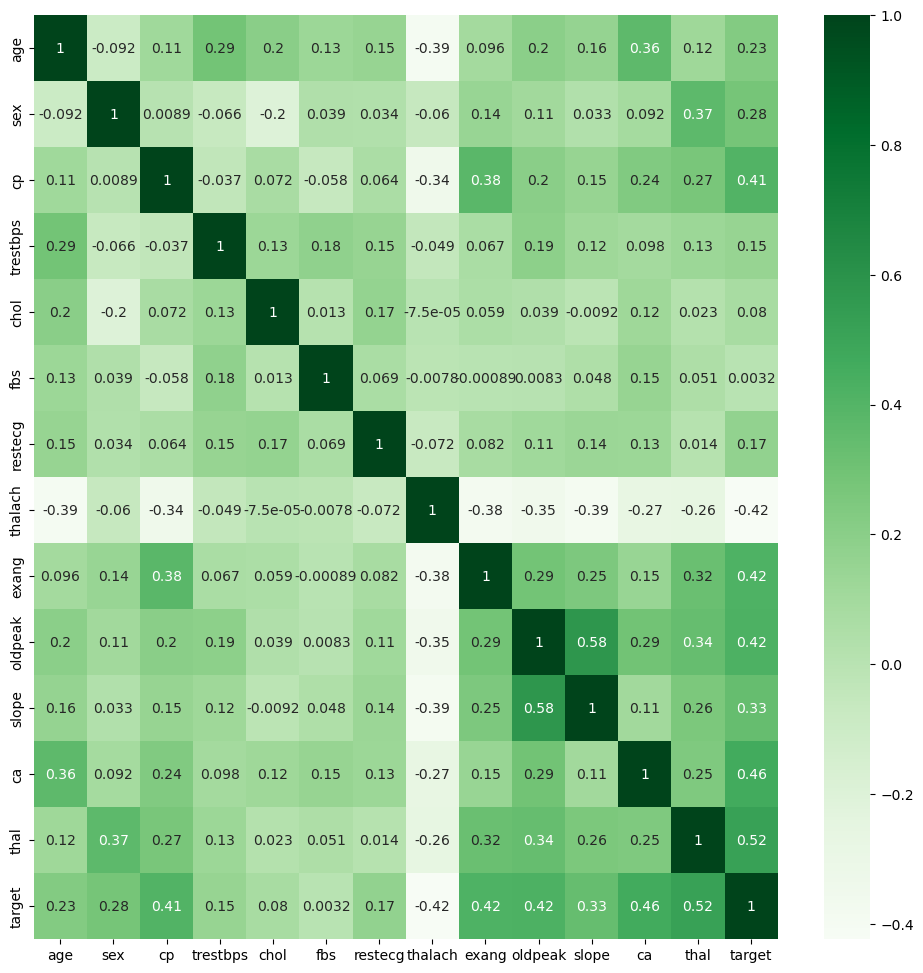

In [26]:
# correlartion matrix
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cbar = True, annot= True,cmap = 'Greens'); 

In [27]:
# feature with strongest corelation with target 
print (df.corr()['target'].sort_values(ascending=False), '\n')

target      1.000000
thal        0.520516
ca          0.463189
oldpeak     0.424052
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
thalach    -0.423817
Name: target, dtype: float64 



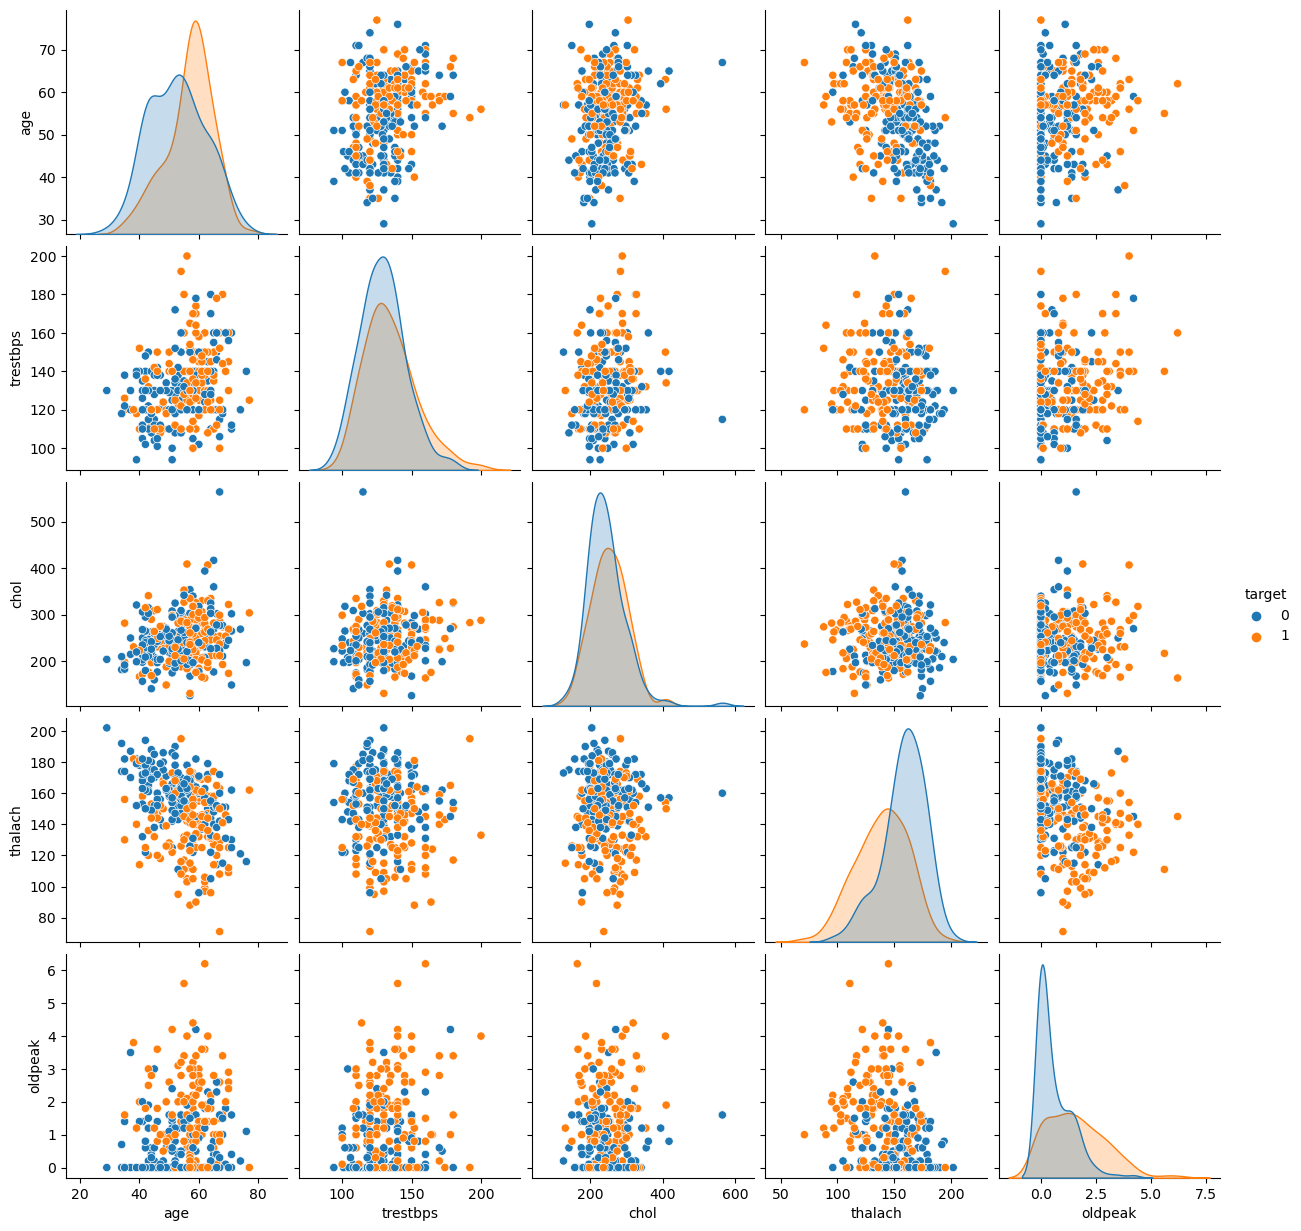

In [28]:
# pair plot with numeric  variables and taget
sns.pairplot(df[['age','trestbps','chol','thalach','oldpeak','target']],hue = 'target');

## Univariatate analysis 

In [29]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [30]:
# replacing catagorical variable encodings to strings for easier eda

df['sex'] = df['sex'].replace({0:'Female',1:'Male'})

df['cp'] = df['cp'].replace({0:'Typical_angina', 1:'Atypical_angina', 2:'Non_anginal_pain', 3:'Asymptomatic' })

df['fbs'] = df['fbs'].replace({0:'Less_than_120mg/ml',1:'Greater_than_120mg/ml'})

df['restecg'] = df['restecg'].replace({0:'Normal',1:'ST-T_wave_abnormality',2:'Left_ventricular_hypertrophy'})

df['exang'] = df['exang'].replace({0:'No',1:'Yes'})

df['slope'] = df['slope'].replace({0:'Upsloping',1:'Flat',2:'Downsloping'})

df['thal'] = df['thal'].replace({0:'Normal', 1:'Fixed_defect', 2:'Reversable_defect'})

df['target'] = df['target'].replace({0:'Healthy', 1:'CVD'})

In [31]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Typical_angina,145,233,Greater_than_120mg/ml,Left_ventricular_hypertrophy,150,No,2.3,Downsloping,0,Fixed_defect,Healthy
1,67,Male,Asymptomatic,160,286,Less_than_120mg/ml,Left_ventricular_hypertrophy,108,Yes,1.5,Flat,3,Normal,CVD
2,67,Male,Asymptomatic,120,229,Less_than_120mg/ml,Left_ventricular_hypertrophy,129,Yes,2.6,Flat,2,Reversable_defect,CVD
3,37,Male,Non_anginal_pain,130,250,Less_than_120mg/ml,Normal,187,No,3.5,Downsloping,0,Normal,Healthy
4,41,Female,Atypical_angina,130,204,Less_than_120mg/ml,Left_ventricular_hypertrophy,172,No,1.4,Upsloping,0,Normal,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,Female,Asymptomatic,140,241,Less_than_120mg/ml,Normal,123,Yes,0.2,Flat,0,Reversable_defect,CVD
298,45,Male,Typical_angina,110,264,Less_than_120mg/ml,Normal,132,No,1.2,Flat,0,Reversable_defect,CVD
299,68,Male,Asymptomatic,144,193,Greater_than_120mg/ml,Normal,141,No,3.4,Flat,2,Reversable_defect,CVD
300,57,Male,Asymptomatic,130,131,Less_than_120mg/ml,Normal,115,Yes,1.2,Flat,1,Reversable_defect,CVD


In [32]:
# labeling discrete and numeric variables
numeric = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
discrete = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# Univariate analysis of target variable

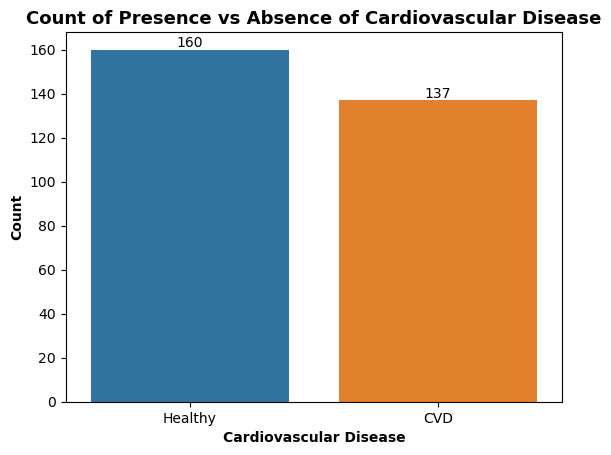

In [33]:
# count plot of target
ax = sns.countplot(data=df, x="target")

values = df['target'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=values)

plt.xlabel('Cardiovascular Disease',fontdict={'fontweight': 'bold', 'fontsize': 10})
plt.ylabel('Count',fontdict={'fontweight': 'bold', 'fontsize': 10})
plt.title('Count of presence vs absence of Cardiovascular Disease', fontdict={'fontweight': 'bold', 'fontsize': 13});

plt.xlabel('Cardiovascular Disease',fontdict={'fontweight': 'bold', 'fontsize': 10})
plt.ylabel('Count',fontdict={'fontweight': 'bold', 'fontsize': 10})
plt.title('Count of Presence vs Absence of Cardiovascular Disease', fontdict={'fontweight': 'bold', 'fontsize': 13});

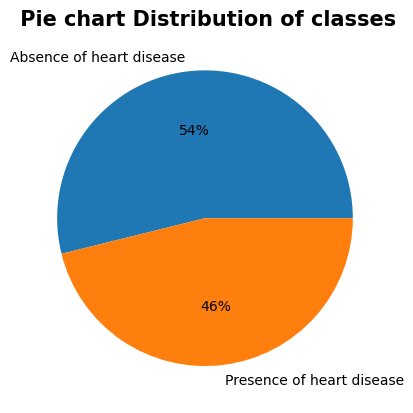

In [34]:
plt.pie(df['target'].value_counts(),labels = ['Absence of heart disease' , 'Presence of heart disease'], autopct = '%.0f%%')
plt.title(' Pie chart Distribution of classes',fontdict={'fontweight': 'bold', 'fontsize': 15});

 # Univariate analysis of other catagorical variables 

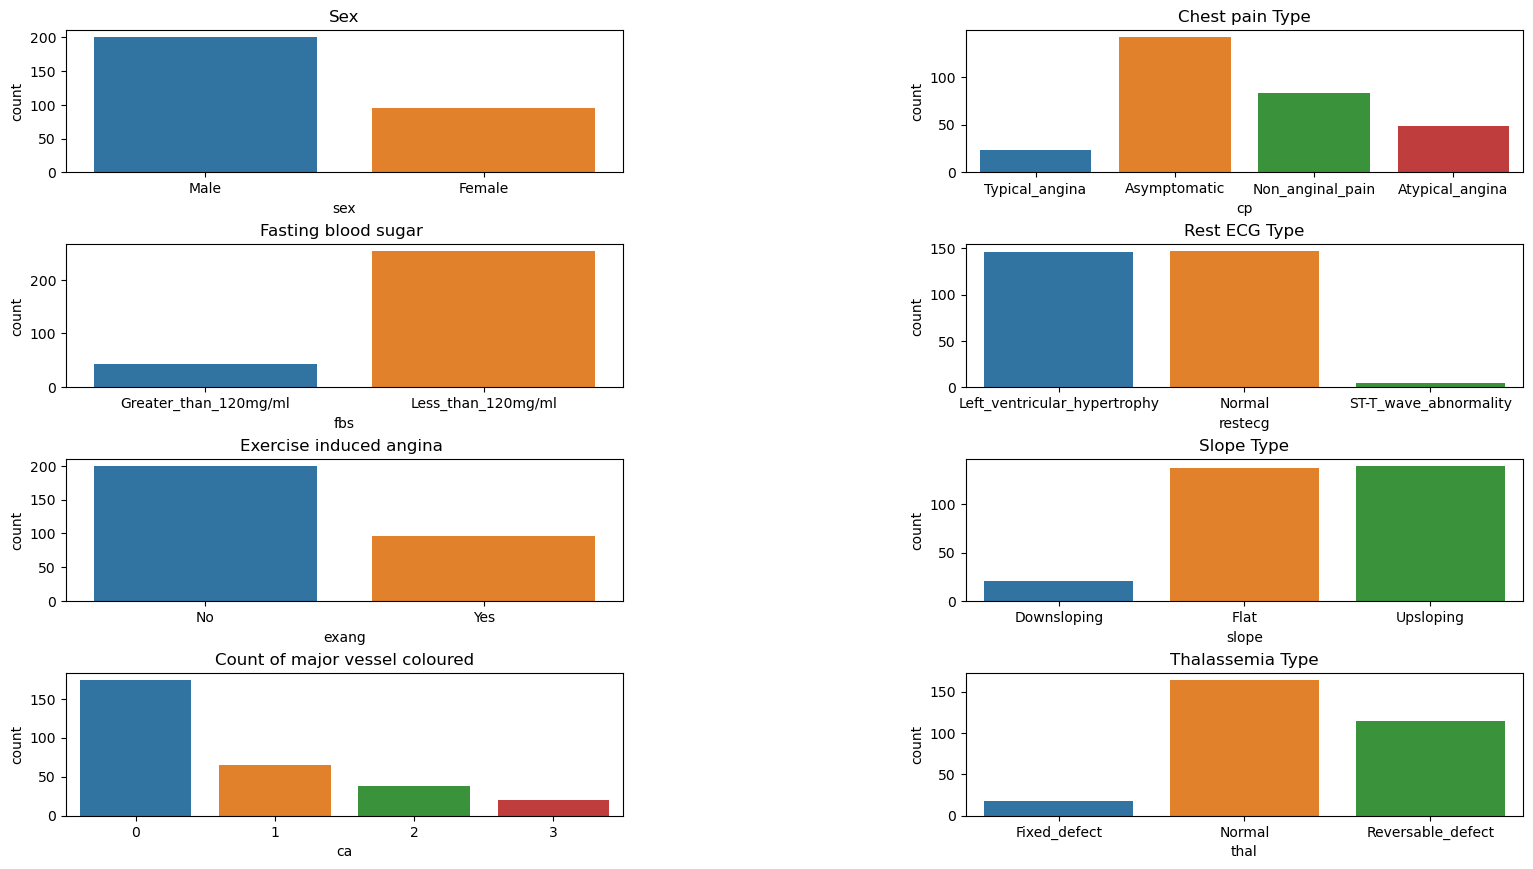

In [35]:
fig = plt.figure(constrained_layout=True, figsize=(18, 10))


grid = gridspec.GridSpec(ncols=6, nrows=5, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Sex')
sns.countplot(df[discrete[0]])

ax2 = fig.add_subplot(grid[0, 3:5])
ax2.set_title('Chest pain Type')
sns.countplot(df[discrete[1]])

ax3 = fig.add_subplot(grid[1, :2])
ax3.set_title('Fasting blood sugar ')
sns.countplot(df[discrete[2]])

ax4 = fig.add_subplot(grid[1, 3:5])
ax4.set_title('Rest ECG Type')
sns.countplot(df[discrete[3]])

ax5 = fig.add_subplot(grid[2, :2])
ax5.set_title('Exercise induced angina ')
sns.countplot(df[discrete[4]])

ax6 = fig.add_subplot(grid[2, 3:5])
ax6.set_title('Slope Type')
sns.countplot(df[discrete[5]])

ax7 = fig.add_subplot(grid[3, :2])
ax7.set_title('Count of major vessel coloured')
sns.countplot(df[discrete[6]])

ax8 = fig.add_subplot(grid[3, 3:5])
ax8.set_title('Thalassemia Type')
sns.countplot(df[discrete[7]]);

# Univariate analysis of numeric variables

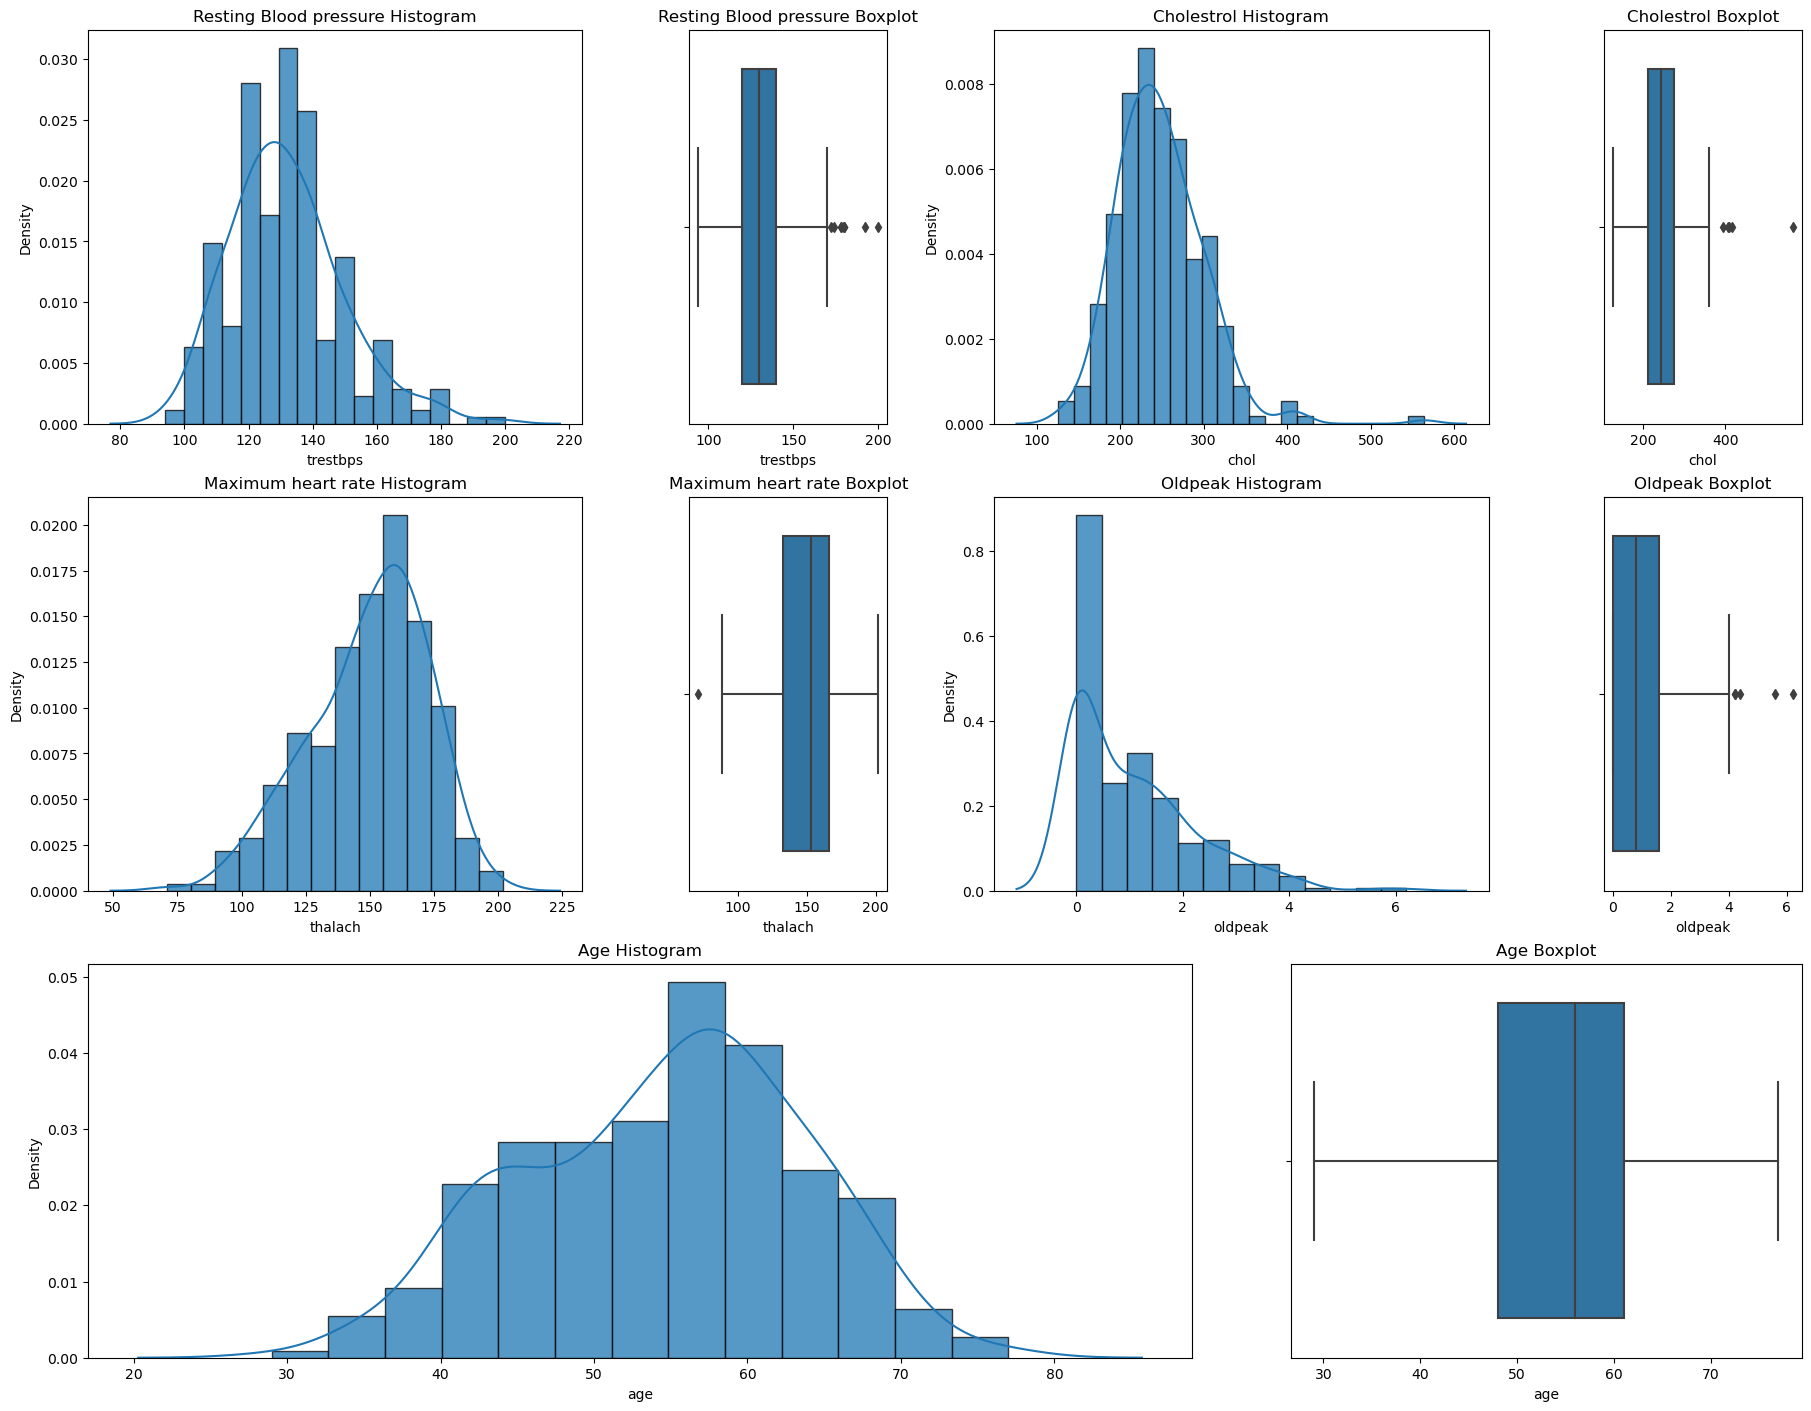

In [36]:
# distribution of numeric varibles
fig = plt.figure(constrained_layout=True, figsize=(18, 14))


grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Resting Blood pressure Histogram')
sns.distplot(df[numeric[1]],hist_kws={'edgecolor': 'black','alpha': 0.75})

ax15 = fig.add_subplot(grid[0, 2:3])
ax15.set_title('Resting Blood pressure Boxplot')
sns.boxplot(df[numeric[1]])

ax2 = fig.add_subplot(grid[0, 3:5])
ax2.set_title('Cholestrol Histogram')
sns.distplot(df[numeric[2]],hist_kws={'edgecolor': 'black','alpha': 0.75})

ax25 = fig.add_subplot(grid[0, 5:])
ax25.set_title('Cholestrol Boxplot')
sns.boxplot(df[numeric[2]])

ax3 = fig.add_subplot(grid[1, :2])
ax3.set_title('Maximum heart rate Histogram')
sns.distplot(df[numeric[3]],hist_kws={'edgecolor': 'black','alpha': 0.75})

ax35 = fig.add_subplot(grid[1, 2:3])
ax35.set_title('Maximum heart rate Boxplot')
sns.boxplot(df[numeric[3]] )

ax4 = fig.add_subplot(grid[1, 3:5])
ax4.set_title('Oldpeak Histogram')
sns.distplot(df[numeric[4]],hist_kws={'edgecolor': 'black','alpha': 0.75})

ax45 = fig.add_subplot(grid[1, 5:])
ax45.set_title('Oldpeak Boxplot')
sns.boxplot(df[numeric[4]] )

ax5 = fig.add_subplot(grid[2, :4])
ax5.set_title('Age Histogram')
sns.distplot(df[numeric[0]],hist_kws={'edgecolor': 'black','alpha': 0.75})

ax55 = fig.add_subplot(grid[2, 4:])
ax55.set_title('Age Boxplot')
sns.boxplot(df[numeric[0]] )

plt.show()

# Bivariate analysis 

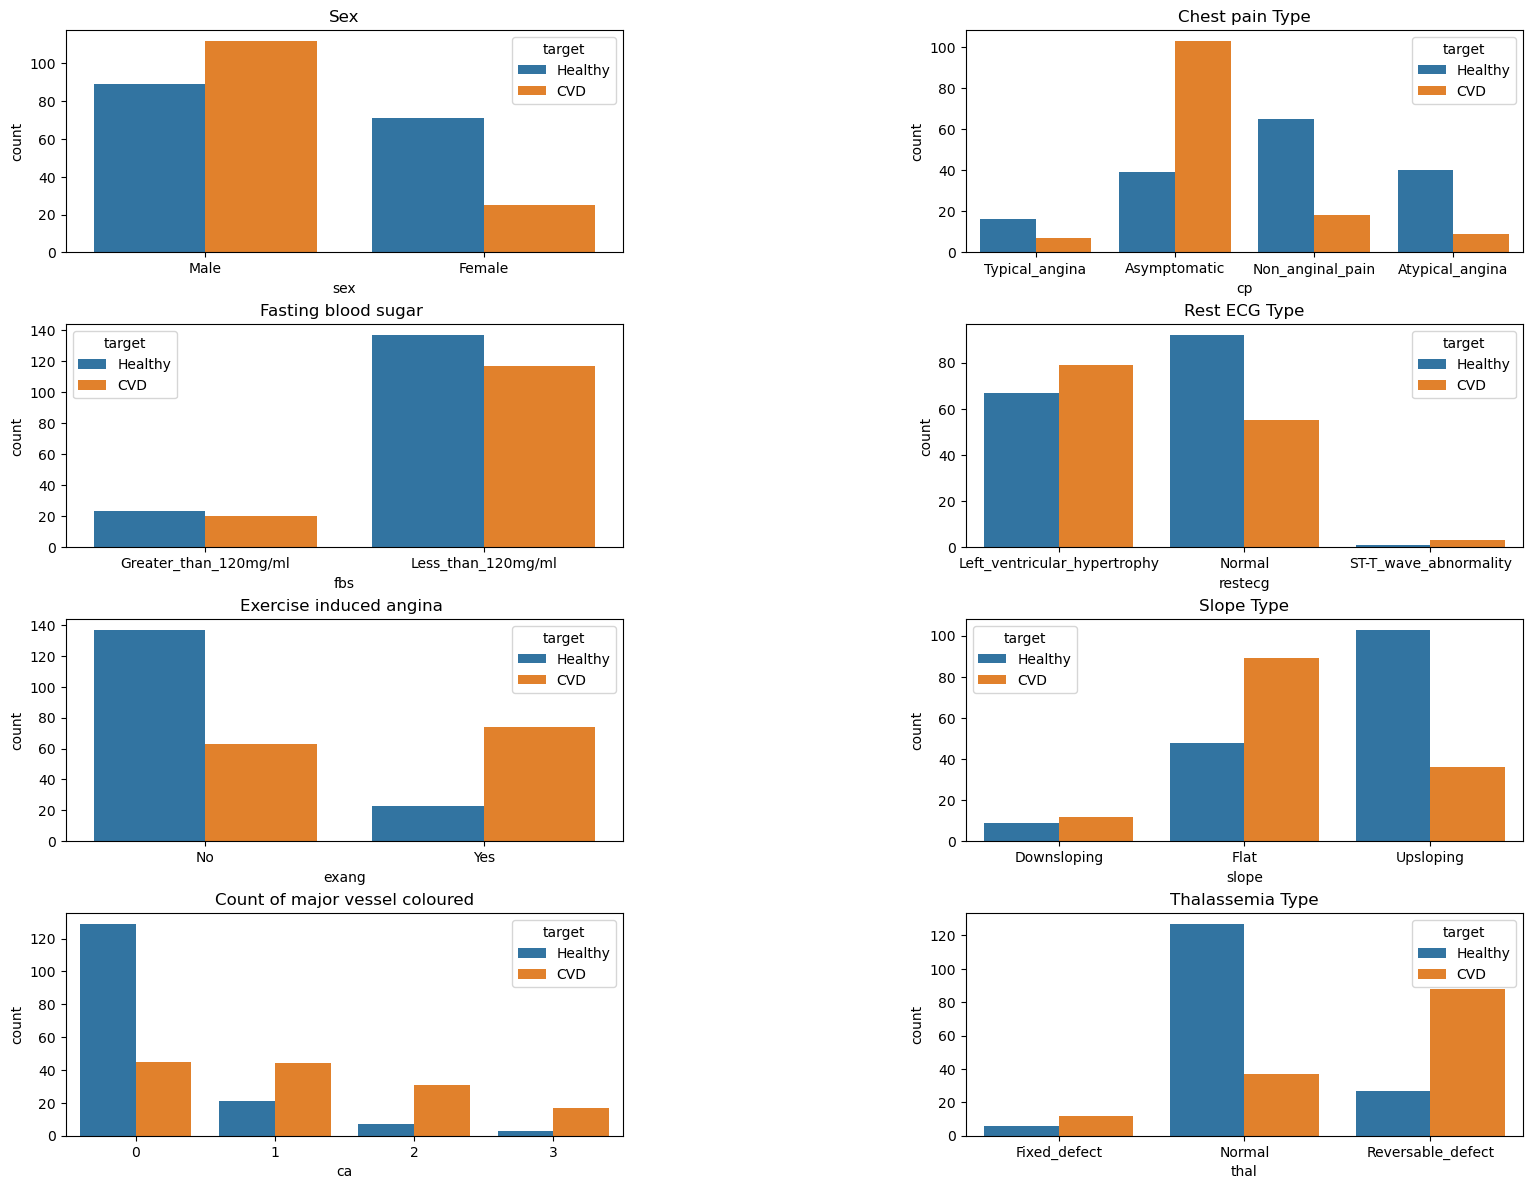

In [37]:
# catagorial featres against disease
fig = plt.figure(constrained_layout=True, figsize=(18, 14))


grid = gridspec.GridSpec(ncols=6, nrows=5, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Sex')
sns.countplot(data = df , x = df[discrete[0]],hue = 'target')

ax2 = fig.add_subplot(grid[0, 3:5])
ax2.set_title('Chest pain Type')
sns.countplot(data = df, x = df[discrete[1]], hue = 'target')

ax3 = fig.add_subplot(grid[1, :2])
ax3.set_title('Fasting blood sugar ')
sns.countplot(data = df, x =  df[discrete[2]], hue = 'target')

ax4 = fig.add_subplot(grid[1, 3:5])
ax4.set_title('Rest ECG Type')
sns.countplot(data = df, x =  df[discrete[3]], hue = 'target')

ax5 = fig.add_subplot(grid[2, :2])
ax5.set_title('Exercise induced angina ')
sns.countplot(data = df, x =  df[discrete[4]], hue = 'target')

ax6 = fig.add_subplot(grid[2, 3:5])
ax6.set_title('Slope Type')
sns.countplot(data = df, x =  df[discrete[5]], hue = 'target')

ax7 = fig.add_subplot(grid[3, :2])
ax7.set_title('Count of major vessel coloured')
sns.countplot(data = df, x =  df[discrete[6]], hue = 'target')

ax8 = fig.add_subplot(grid[3, 3:5])
ax8.set_title('Thalassemia Type')
sns.countplot(data = df, x =  df[discrete[7]], hue = 'target');

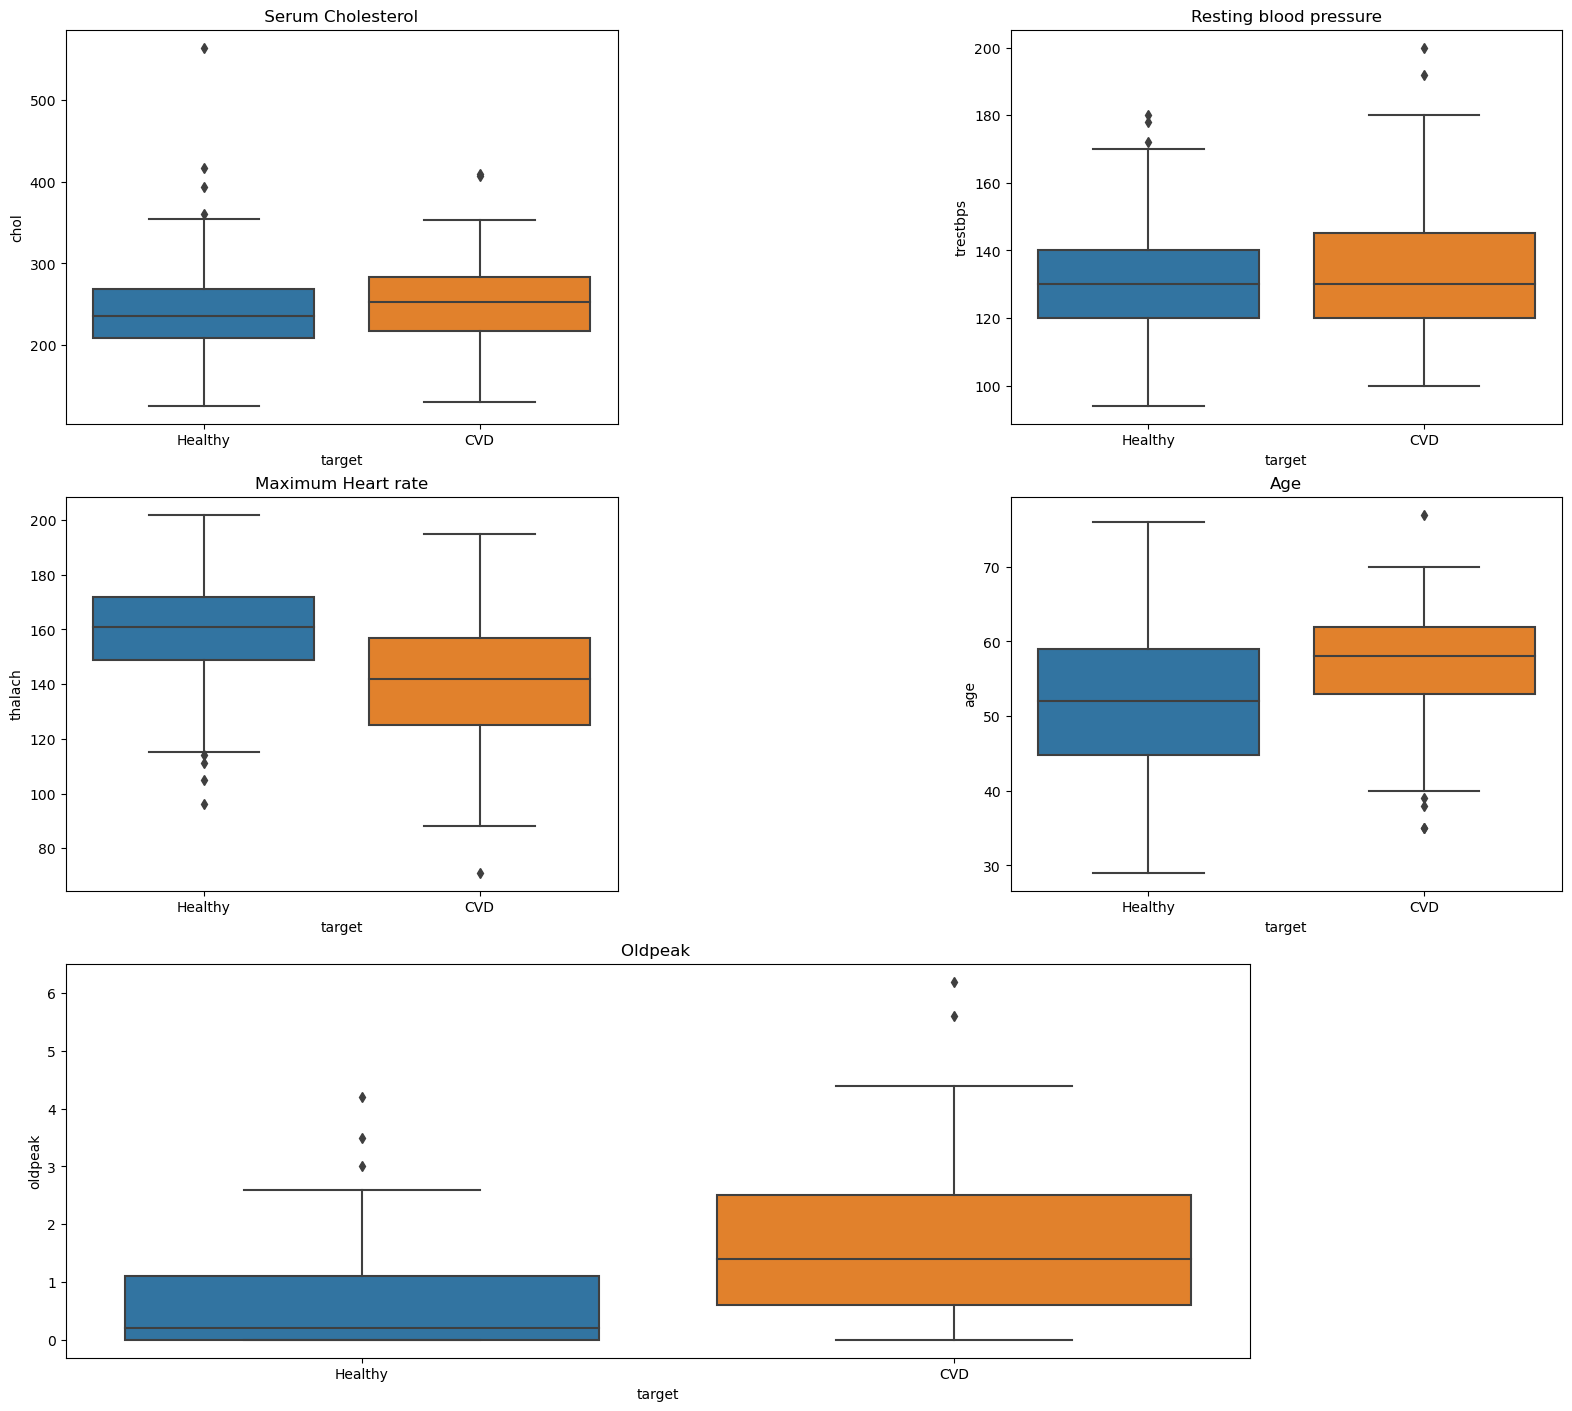

In [38]:
# distribution of numeric varibles against cvd
fig = plt.figure(constrained_layout=True, figsize=(18, 14))


grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)

ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title(' Serum Cholesterol ')
sns.boxplot(y= df[numeric[2]],x = 'target',data =df)


ax2 = fig.add_subplot(grid[0, 3:5])
ax2.set_title('Resting blood pressure')
sns.boxplot(y=df[numeric[1]], x = 'target',data =df)




ax3 = fig.add_subplot(grid[1, :2])
ax3.set_title('Maximum Heart rate')
sns.boxplot(y= df[numeric[3]], x = 'target',data =df )



ax4 = fig.add_subplot(grid[1, 3:5])
ax4.set_title('Age')
sns.boxplot(y =df[numeric[0]], x = 'target',data =df )



ax5 = fig.add_subplot(grid[2, :4])
ax5.set_title('Oldpeak ')
sns.boxplot(y= df[numeric[4]], x = 'target',data =df )


plt.show()